# XGBoost

Notebook to look at forecasts made using random XGBoost.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

warnings.filterwarnings('ignore')

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_54863/3247864242.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from XGBoost import backtest

In [3]:
ds_begin = datetime(2022, 7, 1)
ds_end = datetime(2024, 12, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

## Predictions when removing the seasonality

In [4]:
error = pd.read_csv('XGBoost/errors_sa.csv')
print(error)

    Unnamed: 0  n_estimators  max_depths       MSE      RMSE       MAE  \
0            0            10           5  0.000012  0.003482  0.002839   
1            0            10          10  0.000011  0.003342  0.002725   
2            0            10          15  0.000011  0.003342  0.002725   
3            0            10          20  0.000011  0.003342  0.002725   
4            0            10          25  0.000011  0.003342  0.002725   
5            0            20           5  0.000012  0.003488  0.002811   
6            0            20          10  0.000011  0.003319  0.002724   
7            0            20          15  0.000011  0.003319  0.002724   
8            0            20          20  0.000011  0.003319  0.002724   
9            0            20          25  0.000011  0.003319  0.002724   
10           0            50           5  0.000012  0.003488  0.002811   
11           0            50          10  0.000011  0.003319  0.002724   
12           0            50          

We get the best results for n_estimator = 20 and max_depth = 10. Let us plot the predictions.

In [5]:
features_sa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
               ('Metro_invt_fs_uc_sfrcondo_month', 1),
               ('Metro_new_listings_uc_sfrcondo_month', 1),
               ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_new_pending_uc_sfrcondo_month', 1),
               ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
               ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
               ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [6]:
(y, y_hat) = backtest(features_sa, 20, 10, ds_begin, ds_end, 48, True)

In [7]:
APE = np.abs((y - y_hat) / y)

In [8]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


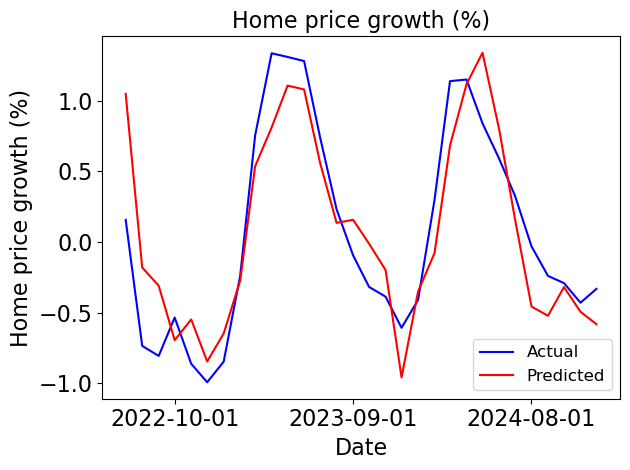

In [9]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/XGBoost_sa.eps', format='eps')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


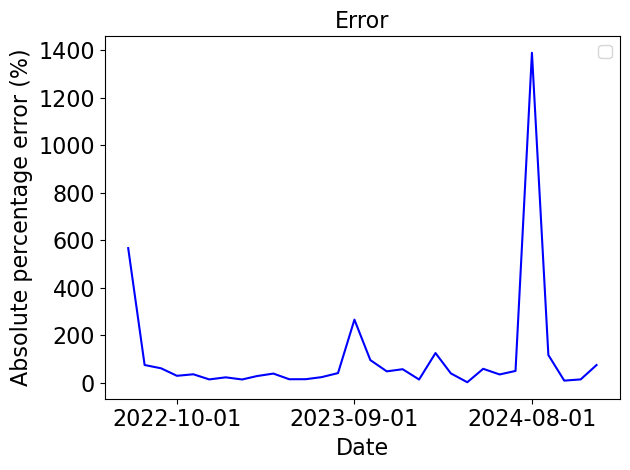

In [10]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * APE, 'b-')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Absolute percentage error (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Error', fontsize=16)

plt.tight_layout()
plt.savefig('figures/XGBoost_APE_sa.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [11]:
error = pd.read_csv('XGBoost/errors_nsa.csv')
print(error)

    Unnamed: 0  n_estimators  max_depths       MSE      RMSE       MAE  \
0            0            10           5  0.000046  0.006788  0.005345   
1            0            10          10  0.000046  0.006760  0.005437   
2            0            10          15  0.000046  0.006760  0.005437   
3            0            10          20  0.000046  0.006760  0.005437   
4            0            10          25  0.000046  0.006760  0.005437   
5            0            20           5  0.000043  0.006573  0.005112   
6            0            20          10  0.000043  0.006581  0.005324   
7            0            20          15  0.000043  0.006581  0.005324   
8            0            20          20  0.000043  0.006581  0.005324   
9            0            20          25  0.000043  0.006581  0.005324   
10           0            50           5  0.000043  0.006561  0.005106   
11           0            50          10  0.000043  0.006580  0.005324   
12           0            50          

We get the best results for n_estimator = 100 and max_depth = 5. Let us plot the predictions.

In [12]:
features_nsa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
                ('Metro_invt_fs_uc_sfrcondo_month', 1),
                ('Metro_new_listings_uc_sfrcondo_month', 1),
                ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
                ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
                ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
                ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
                ('Metro_new_pending_uc_sfrcondo_month', 1),
                ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
                ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
                ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [13]:
(y, y_hat) = backtest(features_nsa, 100, 5, ds_begin, ds_end, 48, False)

In [14]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


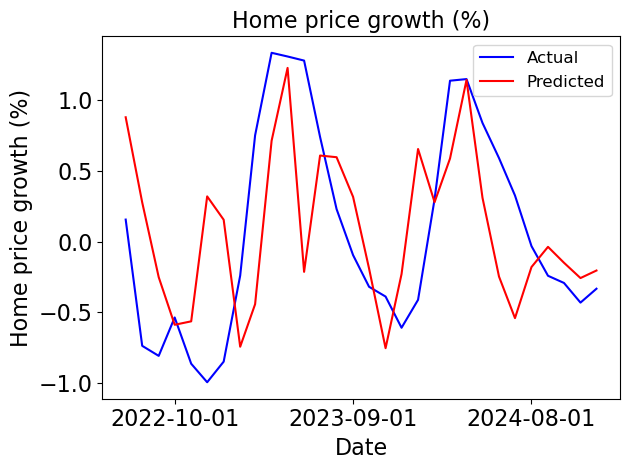

In [15]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/XGBoost.eps', format='eps')
plt.show()